<center><h1>Graph project: Epidemic spreading</h1></center>

<center><h4>ENSEEIHT SN</h4></center>

<div style="width:75%;margin:0 auto;">
    
## Introduction
<a id='intro'></a>
    
<p style="text-align:justify;"> As you know, a new epidemic has overwhelmed the world, COVID-19 jeopardizes people and changes our habits. It is easy to realise that knowing how illnesses spread is vital to our own protection. How can we predict whether a disease will cause an epidemic, how many people it will infect, which people it will infect, and whether or not it is dangerous to society as a whole ? Also, how can we determine which techniques to use in fighting an epidemic once it begins ? One way to answer all of these questions is through <strong>mathematical modeling</strong>. </p>

<p style="text-align:justify;"> In this work you will have to review different epidemic modelings relying all on the representation by graphs of a human network called a <strong>contact network</strong>. A vertex in a contact network represents an individual and an edge between two vertices represents a contact between two individuals. The disease only spread from individual to individual if they are in contact, so through the edges. This representation is actually really common in research, and a lot of state-of-the-art modeling are built over it. From these different models you will be asked to draw conclusions from experiments on varying contact networks</p>

<p style="text-align:justify;"> For readability and ease of use, this project will be carried on a Jupyter Notebook, hence code and question answering have to be written in this unique file. This is a <strong>DUO</strong> project, no group of one person will be accepted, the duo has to be composed of same TD group students, if the number of students in the TD group is odd we will accept one group composed of three students. It will be coded in Julia using the LightGraphs package. <strong>BEWARE:</strong> 
    
- If the code does not provide good results, its readability as well as its comments are essential for the corrector to potentially find some notation points.
- The specifications of the functions have to be strictly respected.
- Do not neglect written questions they stand for an important part of the notation, you are not only evaluated on the coding. Also, even so a written question may not ask you directly to code or provide results from code, support your arguments when possible with a runable example is very welcome and sometimes even expected.
- Any initiatives and additional efforts bringing contents and thoughts out of the question scope may result in bonus points if pertinent.
</p> 
    
<p style="text-align:justify;"> Deliverable: You will deliver your work on moodle before <strong style="font-size:1.3em">23.01.2022</strong> in a <strong style="font-size:1.3em">.tar</strong> containing the notebook with your codes and your written answers, and the different graph figures in .png you will generate. The corrector will use the student N7 computers for running your code, so take care of verifying that your work is running as expected on these computers !</p>

LightGraphs documentation: https://juliagraphs.org/LightGraphs.jl/v1.2/index.html
    
<!---
http://makie.juliaplots.org/stable/basic-tutorial.html#Adding-plots-to-a-Scene
TODO: afficher l'historique gplot des graphes durant la simu pour voir visuellement ce que ça donne. Peut etre necessiter de locker l'affichage graphique.
afficher pour tau fixer sur different graphe de degré le nombre max d'infecté durant la simu.
    
Faire coder le modèle SAIS et SIR

    Pour SIR faire la courbe dans un des sites dans les favoris
    
    Expliquer en quoi la distance et Jordan ne sont pas tout le temps optimal. Expliquer pourquoi le DMP peut présenter de meilleur résultat.

Demander d'imaginer d'autres modèle inspirer de maladie
--->
</div>


<div style="width:75%;margin:0 auto;">

## Environment and packages installation
<a id='env'></a>
    

<p style="text-align:justify;"> <strong>IMPORTANT</strong>: For evaluation, coding questions have to run with no additional packages ! Only the ones present here ! However if you want to use another package to go further in your answer and add bonus contents, take care of separating the cells and precising which packages you are using.</p>

</div>


In [ ]:
# TO RUN ONCE
using Pkg
Pkg.activate(".") # Path to Manifest.toml and Project.toml
Pkg.resolve()

In [1]:
# Import packages
using Pkg
Pkg.activate(".") # Path to Manifest.toml and Project.toml
using LightGraphs
using GraphPlot
using Colors
using CairoMakie
using StatsBase
using Plots
using JLD2
using Compose

# Include local packages
include("lib.jl")
include("sis.jl")
include("sir.jl")
include("sair.jl")

 Activating environment at `~/Documents/GitHub/epidemic-spreading-sim/src/Project.toml`


<div style="width:75%;margin:0 auto;">

## Part 1 - SIS model
<a id='part1'></a>

SIS is a compartmental model, ie a model where the population is divided into subgroups that represent the disease status of its members. SIS stands for Susceptible $\rightarrow$ Infected $\rightarrow$ Susceptible where the susceptible group contains those who remain susceptible to the infection, and the infected group consists of those who not only have the disease but are also in the contagious period of the disease.
    
Combine with a contact network approach, this model can capture contact patterns (family, company, friends). Each vertex represents an individual in the host population, and contacts between two individuals are represented by an edge that connects the two. The probability of transmitting the disease from an infected to a susceptible individual along one of these edges or contacts is $\beta$ (=<strong>infection rate</strong>). The probability to cure is $\alpha$ (= <strong>curing rate</strong>).

    
In order for a disease to begin spreading through a network, the disease must be introduced into the population, either through infecting a proportion of the population or through infecting one individual. As time moves forward, the disease will spread away from those initially infected, and two things may occur simultaneously at each time step $t$. First, each infected individual will spread disease to each of its contacts with a probability $\beta$. Secondly, each infectious individual will recover at a rate, $\alpha$ , at which point the individual will then no longer infect any of its contacts. After the disease has run its course, we can determine how the disease affected the network by calculating various quantities that help us better understand the outbreak.

<br>
    
<p style="font-size:0.9em">P. Van Mieghem, J. Omic, R. E. Kooij, <em>“Virus Spread in Networks”</em>,
IEEE/ACM Transaction on Networking (2009)<p>

</div>
<!---
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font size = 4.5px><b>Algorithm 1:</b> Girvan Newman</font><br>
    <div style="margin-left:50px;border-left:2px solid black;padding-left:10px;">
    <b> WHILE </b> there are still edges<b> OR </b> desired nb of communities unreached <b>DO</b>
        <div style="margin-left:50px;border-left:2px solid black;padding-left:10px;">
        Calculate betweeness of all edges <br>
        Remove the edge with the highest betweeness <br>
        Calculate the number of strongly connected components
        </div>
    <b> END WHILE </b>   
    </div>
</div>
--->

<div style="width:75%;margin:0 auto;">

### 1.1 Contact networks sample

In [55]:
"""karat7: A graph representing the karate club of N7 and the connections between the persons in this club.
There are 34 people in this network. It is actually inspired by one of the most famous problem in graph
theory: the Zachary's karate club.
"""
karat7 = smallgraph(:karate)
nodecolor = [colorant"lightseagreen"]
draw(PNG("out/karat7.png", 100cm, 100cm), gplot(karat7,nodefillc=nodecolor))

In [3]:
"""n7_2A: A graph representing the second year students at N7. Each department (SN, MF2E, 3EA) form a 
community where connections are denser, connections between department are rarer.
"""
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
n=[100,70,50]
n7_2A = stochastic_block_model(c,n)
nodecolor = [colorant"lightseagreen"]
draw(PNG("out/n7_2A.png", 100cm, 100cm), gplot(n7_2A,nodefillc=nodecolor))

In [3]:
"""toulouse_neigh: A graph representing a neighborhood composed of 1000 people in Toulouse.
"""
toulouse_neigh = barabasi_albert(1000, 1)
nodecolor = [colorant"lightseagreen"]
draw(PNG("out/toulouse_neigh.png", 100cm, 100cm), gplot(toulouse_neigh,nodefillc=nodecolor))

<div style="width:75%;margin:0 auto;">
  
### 1.2 Introduce the infection
    
<p style="text-align:justify;">We denote by <code>state</code> a vector containing the disease status of each vertex where Susceptible=0 and Infected=1. Then <code>state</code> is an <code>Array{Int32,1}</code> of length the number of vertices. This array in addition of a graph (represented internally by an adjacency matrix or an adjacency list) will be the data structure of our model.</p>
    
<span style="font-size:0.9em">In <code>Array{Int32,1}</code>, <code>Int32</code> refers to the kind of data in the array, here 32 bits integers, <code>1</code> refers to the dimension of the array, here we have a 1-dimensional structure so a vector.</span>
</div>

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 1 (code):</strong> For each graph in the graph sample (<code>karat7</code>, <code>n7_2A</code>, <code>toulouse_neigh</code>) initialize the state array by assigning each vertex to susceptible and add randomly one or numerous infected people. Save the graph as a .png image using <code>gplot</code> and <code>draw</code>, infected should appear in a different color (<code>colorant"orange"</code>).
    
Due to a bug on certain version of Jupyter Notebook, the graph <span style="font-size:1.3em">figures should be saved in a file and not plot inside the notebook </span> !!!
    
Gplot GitHub: https://github.com/JuliaGraphs/GraphPlot.jl
    
Gplot examples: https://juliagraphs.org/GraphPlot.jl/
</div>


In [59]:
# Infect Karat7
karat7 = smallgraph(:karate)
cleannodecolor = colorant"lightseagreen"
infectednodecolor = colorant"orange"
# randomly choose ammount of infected people
infected = rand(1:floor(Int, nv(karat7)/2))
# randomly choose patient zero
patient_zero_indices = [rand(1:nv(karat7)) for i in 1:infected]
# create a list of uninfected nodes
nodecolor = [cleannodecolor for i in 0:nv(karat7)]
# infect previously chosen nodes
for i in 1:infected
  nodecolor[patient_zero_indices[i]] = infectednodecolor
end
# draw the graph
draw(PNG("out/karat7.png", 100cm, 100cm), gplot(karat7, nodefillc=nodecolor))

In [61]:
# Infect N7_2A
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
n=[100,70,50]
n7_2A = stochastic_block_model(c,n)
cleannodecolor = colorant"lightseagreen"
infectednodecolor = colorant"orange"
# randomly choose the number of infected people
infected = rand(1:floor(Int, nv(n7_2A) / 2))
# randomly choose patient zero
patient_zero_indices = [rand(1:nv(n7_2A)) for i in 1:infected] 
# create a list of uninfected nodes
nodecolor = [cleannodecolor for i in 0:(nv(n7_2A))]
# infect patient zero
for i in 1:infected
    nodecolor[patient_zero_indices[i]] = infectednodecolor
end
# draw the graph
draw(PNG("out/n7_2A.png", 100cm, 100cm), gplot(n7_2A,nodefillc=nodecolor))

In [7]:
# Infect Toulouse_neigh
toulouse_neigh = barabasi_albert(1000, 1)
cleannodecolor = colorant"lightseagreen"
infectednodecolor = colorant"orange"
# randomly choose the number of infected people
infected = rand(1:floor(Int, nv(toulouse_neigh)/2))
# randomly choose patient zero
patient_zero_indices = [rand(1:nv(toulouse_neigh)) for i in 1:infected] 
# create a list of uninfected nodes
nodecolor = [cleannodecolor for i in 0:(nv(toulouse_neigh))]
# infect patient zero
for i in 1:infected
    nodecolor[patient_zero_indices[i]] = infectednodecolor
end
# draw the graph
draw(PNG("out/toulouse_neigh.png", 100cm, 100cm), gplot(toulouse_neigh,nodefillc=nodecolor))

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 2 (written):</strong> What do you think/predict about the influence of the initial number of infected people and their locations on the evolution of an SIS model epidemic ?

<br>

Plus il y a de personnes infectées au départ, plus l'infection se fera rapidement. De la même manière, plus les personnes infectées sont éloignées, plus la contagion se produira rapidement.

</div>


<div style="width:75%;margin:0 auto;">
  
### 1.3 Spread the infection

<div style="width:75%;margin:0 auto;">
      
<strong style="color:cornflowerblue">Question 3 (code):</strong> Implement the <code>function SIS</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$.
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SIS(net,state,beta,alpha,t)</code> with your code.</span>

</div>


In [8]:
# Code can be found in sis.jl
include("sis.jl")

Simulation_SIS

In [9]:
# Test on Karat7
nombre_infecte = 1
karat7 = smallgraph(:karate)
state = init_State(nv(karat7), nombre_infecte)
beta = 0.1
alpha = 0.3
t = 10
state = SIS(karat7,state,beta,alpha,t)
draw_Net_Graph(karat7, state, "karat7.png")

In [10]:
# Test on N7_2A
nombre_infecte = 3
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
n=[100,70,50]
n7_2A = stochastic_block_model(c,n)
state = init_State(nv(n7_2A), nombre_infecte)
beta = 0.1
alpha = 0.5
t = 10
state = SIS(n7_2A,state,beta,alpha,t)
draw_Net_Graph(n7_2A, state, "n7_2A.png")

In [11]:
# Test on Toulouse_neigh
nombre_infecte = 10
toulouse_neigh = barabasi_albert(1000, 1)
state = init_State(nv(toulouse_neigh), nombre_infecte)
beta = 0.1
alpha = 0.5
t = 20
state = SIS(toulouse_neigh,state,beta,alpha,t)
draw_Net_Graph(toulouse_neigh, state, "toulouse_neigh.png")

<div style="width:75%;margin:0 auto;">

### 1.4 Simulate and understand the epidemic
    
<p style="text-align:justify;">In the SIS model of this project, every disease is characterized by:
    
* The infection rate $\beta$ representing the chance of infection when being in contact with an infected individual.
* The curing rate $\alpha$ representing the chance of being cured of the disease.
* The effective spreading rate $\tau=\frac{\beta}{\alpha}$ representing the capacity of the disease to spread. More the disease infect easily ($\beta$ high) and less it is cured easily ($\alpha$ low) more $\tau$ can be high.

We are now willing to understand what are the influences of these parameters as well as the contact network shape on an epidemic.</p>

</div>


<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 4 (written):</strong> The <code>function SIS</code> you implemented launches one run of a SIS model on a given contact network. As it makes use of randomness, one run of spreading is stochastic. Then what simple method can you propose to provide a prediction of the disease spreading on a given contact network ?
   
<br>

On peut estimer l'évolution de la propagation de la maladie en lançant la simulation un grand nombre de fois jusqu'à obtenir des statistiques suffisament fiables

</div>


<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 5 (code):</strong> Implement the <code>function Simulation_SIS</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SIS(net,nbinf,betas,alphas,t,nbsimu)</code> with your code.</span>

</div>


In [28]:
# Code can be found in sis.jl
include("sis.jl")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 6 (written)</strong>: Run the 2 scripts below and describe what you see. Conclude on the influence of $\tau$, $\beta$, and $\alpha$ on an epidemic we can model with SIS.
    
<br>

We can see how, the lower the effective spreading rate $\tau$ gets, the longer it takes for the population to get infected. Therefore, we can assume that a higher $\beta$ and a lower $\alpha$ mean a faster infection with the SIS model.

</div>


In [101]:
# Script launching predictions on different diseases on karat7 and printing 
# the precentage of infected at each time step.
karat7 = smallgraph(:karate)

betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]

# The original code is commented out because only 60 time steps are needed 
# for the sim to stabilize itself.

# predictions, taus = Simulation_SIS(karat7,2,betas,alphas,1000,1000)
predictions, taus = Simulation_SIS(karat7,2,betas,alphas,60,1000)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="Avg % of infected")
savefig("out/karat7_predictions_SIS.png") # comment this line if you want to see the plot

In [102]:
# Same as before but applied on toulouse_neigh. May be a bit long to run.
toulouse_neigh = barabasi_albert(1000, 1)

betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

# Same thing here, the original timestep values were waaay too high. I really can't leave my computer
# running overnight every time I want to run this script.

# predictions, taus = Simulation_SIS(toulouse_neigh,100,betas,alphas,1000,100)
predictions, taus = Simulation_SIS(toulouse_neigh,100,betas,alphas,100,100)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="Avg % of infected")
savefig("out/toulouse_neigh_predictions_SIS.png") # comment this line if you want to see the plot

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 7 (written):</strong> Change the initial number of infected in the scripts above, is it in accordance with your answer in Question 2 ?
    
<br>

Yes, the result does make sense. The speed at which the population gets infected is still proportional to the effective spreading rate $\tau$. The result does not appear on this notebook though, as we did not run the simulation more than once (it takes a long time to complete, and we mistakenly cleared the cell outputs a couple days ago).
</div>


In [ ]:
# Change the initial number of infected
karat7 = smallgraph(:karate)

betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]

predictions, taus = Simulation_SIS(karat7,8,betas,alphas,1000,1000)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="Avg % of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 8 (code):</strong> Implement a script plotting the maximum percentage of infected people according to $\tau$ over 300 time steps for 3 contact networks:

* A regular graph of 200 vertices with degree 2.
* A regular graph of 200 vertices with degree 5.
* A regular graph of 200 vertices with degree 10.

You can use the function <code>random_regular_graph(n,d)</code> of LighGraphs. As you probably need to use a certain number of different values of $\tau$ to visualize something interesting (the more there are the more the figure will be smooth) you should fix $\alpha$ and make $\beta$ vary. 

<span style="font-size:0.9em">A regular graph is a graph where each vertex has the same degree.</span>

</div>

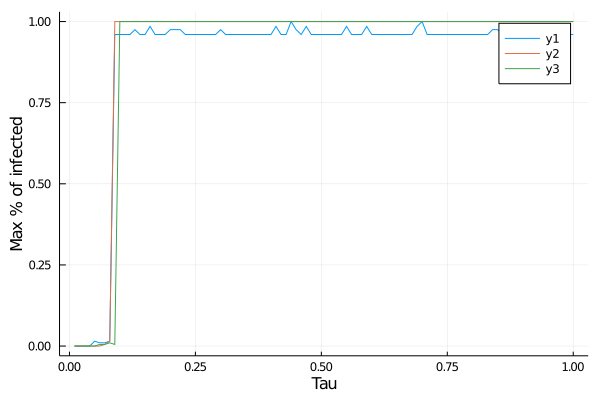

In [66]:
# Plots of the maximum percentage of infected people according to tau over 300 time 
# steps for 3 contact networks.

samples = 100
initial_infected = 5

graph1 = random_regular_graph(200, 2)
graph2 = random_regular_graph(200, 5)
graph3 = random_regular_graph(200, 10)

alphas=[10 for i in 1:samples]
betas=[i*0.1 for i in 1:samples]
taus = betas ./ alphas

prediction1, ~ = Simulation_SIS(graph1, initial_infected, betas, alphas, 300, 1)
prediction2, ~ = Simulation_SIS(graph2, initial_infected, betas, alphas, 300, 1)
prediction3, ~ = Simulation_SIS(graph3, initial_infected, betas, alphas, 300, 1)

output = zeros(samples, 3)

# calculate the maximum percentage of infected people for each tau
output[:, 1] = [findmax(prediction1[:,i])[1] for i in 1:samples]
output[:, 2] = [findmax(prediction2[:,i])[1] for i in 1:samples]
output[:, 3] = [findmax(prediction3[:,i])[1] for i in 1:samples]

# plot the results
Plots.plot(taus, output, xlabel="Tau",ylabel="Max % of infected")
savefig("out/max_infected.png") # comment this line if you want to see the plot

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 9 (written):</strong> Describe the figure and draw conclusions on the epidemic behavior for different degrees $d$ on regular graphs. Thus, in addition of the inner properties of the disease ($\alpha$, $\beta$, $\tau$) what other parameter is essential in the spreading ? Finally, what analogy can be done with real life from this experiment ?
    
<br>
    
The figure shows us that the higher the degree of the graph, the easier it is for the disease to spread, as the vertices are more connected.

However, this is not the only decisive factor, as we can clearly see that the effective spreading rate $\tau$ has a strong influence on whether the disease manages to infect the population or not. 

This simulation makes it clear that social distancing, and the infection to recovery probability ratio, are the two most important factors in the spreading of a disease.

</div>


<div style="width:75%;margin:0 auto;">

## Part 2 - SIR and SAIR model
<a id='part2'></a>

Unfortunately SIS model is valuable for diseases we can catch back since a cured person can get ill again. This is true for the flu, the cold, etc. However COVID-19 might create immunity for whom already got it and SIS can not take into account immune or dead persons. That is why we propose in this part to consider another model more adapted to COVID-19 called SIR. It stands for Susceptible $\rightarrow$ Infected $\rightarrow$ Recovered where the susceptible group contains those who remain susceptible to the infection, the infected group consists of those who not only have the disease but are also in the contagious period of the disease, and the recovered group contains those who were ill, got cured, are not contagious and can not get ill anymore.

<br/>

<p style="font-size:0.9em">M. Youssef and C. Scoglio, <cite>"An individual-based approach to SIR epidemics in contact networks"</cite>, Journal of Theoretical Biology 283 (2011)</p>

<br/>
    
One limitation of SIR is that it does not model the reaction of humans when they feel the presence of the epidemic. Indeed, if feeling threatened or surrounded by infected, an individual may change its behaviors: wear mask, wash its hands, etc. This result in a smaller infection rate. That is why in this part we will also consider a variant of SIR called SAIR which stands for Susceptible $\rightarrow$ Alert $\rightarrow$ Infected $\rightarrow$ Recovered. A susceptible individual becomes infected by the infection rate $\beta_0$, an infected individual recovers and gets immune by the curing rate $\alpha$, an individual can observe the states of its neighbors, then a susceptible individual might go to the alert state if surrounded by infected individuals with an alert rate $\kappa$ on each contact with an infected, an alert inividual becomes infected by the infection rate $\beta_1$ where $0<\beta_1<\beta_0$. In our simple SAIR model, an individual can not go back to a susceptible state when he got into the alert state.
    
<br/>
    
<p style="font-size:0.9em"> F. Darabi Sahneh and C. Scoglio, <cite>"Epidemic Spread in Human Networks"</cite>, 50th IEEE Conf. Decision and Contol, Orlando, Florida (2011)</p>

</div>


<div style="width:75%;margin:0 auto;">

### 2.1 SIR
    
<p style="text-align:justify;">The vector containing the disease status <code>state</code> has to change a bit since we added a new state. Hence it will be an <code>Array{Int32,1}</code> where Susceptible=0, Infected=1, and Recovered=2.</p>
</div>


<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 10 (code):</strong> Implement the <code>function SIR</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$. Recovered vertices should appear in a different color (<code>colorant"purple"</code>).
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SIR(net,state,beta,alpha,t)</code> with your code.</span>
</div>


In [97]:
# Code can be found in sir.jl
include("sir.jl")

Simulation_SIR

In [98]:
# Test on Karat7
nombre_infecte = 1
karat7 = smallgraph(:karate)
state = init_State(nv(karat7), nombre_infecte)
beta = 0.1
alpha = 0.3
t = 10
state = SIR(karat7,state,beta,alpha,t)
draw_Net_Graph(karat7, state, "SIR_karat7.png")

In [87]:
# Test on N7_2A
nombre_infecte = 3
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
n=[100,70,50]
n7_2A = stochastic_block_model(c,n)
state = init_State(nv(n7_2A), nombre_infecte)
beta = 0.1
alpha = 0.5
t = 10
state = SIR(n7_2A,state,beta,alpha,t)
draw_Net_Graph(n7_2A, state, "SIR_n7_2A.png")

In [88]:
# Test on Toulouse_neigh
nombre_infecte = 10
toulouse_neigh = barabasi_albert(1000, 1)
state = init_State(nv(toulouse_neigh), nombre_infecte)
beta = 0.1
alpha = 0.5
t = 20
state = SIR(toulouse_neigh,state,beta,alpha,t)
draw_Net_Graph(toulouse_neigh, state, "SIR_toulouse_neigh.png")

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 11 (code):</strong> Implement the <code>function Simulation_SIR</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SIR(net,nbinf,betas,alphas,t,nbsimu)</code> with your code.</span>

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 12 (written):</strong> Run the script below and describe what you see. Why the infected curve does not behave the same as for SIS ? 
    
<br>

Dans le cas du modèle SIS, toute personne soigné peut être à nouveau infecté, donc le taux d'infection va tendre vers une valeure non nulle si alpha n'est pas trop grand comparé à beta. Tandis que pour le modèle SIR, une personne infecté finira par être soigné et ne pourra plus être infecté donc la courbe converge vers 0 personnes infectées.

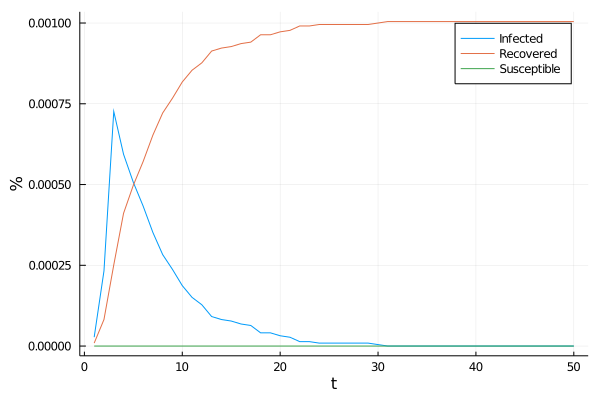

In [104]:
# Script launching prediction on one disease on n7_2A and plotting the percentage
# of infected, susceptible and recovered at each time step.
predictions, taus = Simulation_SIR(n7_2A,2,[0.3],[0.2],50,1000)

Plots.plot([predictions[:,:,1] predictions[:,:,2] predictions[:,:,3]],
           label=["Infected" "Recovered" "Susceptible"],xlabel="t",ylabel="%")
savefig("out/n7_2A_predictions_SIR.png") # comment this line if you want to see the plot

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 13 (written):</strong> As for Question 6 script 2 plot the evolution of the percentage of infected for many $\tau$. Describe what you see.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong></div>

In [ ]:
# Equivalent experiment as for Question 6 script 2

# Script launching predictions on different diseases on karat7 and printing 
# the precentage of infected at each time step.
karat7 = smallgraph(:karate)

betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]

# The original code is commented out because only 60 time steps are needed 
# for the sim to stabilize itself.

# predictions, taus = Simulation_SIS(karat7,2,betas,alphas,1000,1000)
predictions, taus = Simulation_SIR(karat7,2,betas,alphas,60,1000)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="Avg % of infected")
savefig("out/karat7_predictions_SIR.png") # comment this line if you want to see the plot

In [ ]:
# Same as before but applied on toulouse_neigh. May be a bit long to run.
toulouse_neigh = barabasi_albert(1000, 1)

betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

# Same thing here, the original timestep values were waaay too high. I really can't leave my computer
# running overnight every time I want to run this script.

# predictions, taus = Simulation_SIS(toulouse_neigh,100,betas,alphas,1000,100)
predictions, taus = Simulation_SIR(toulouse_neigh,100,betas,alphas,100,100)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="Avg % of infected")
savefig("out/toulouse_neigh_predictions_SIR.png") # comment this line if you want to see the plot

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 14 (code):</strong> Implement a script plotting the number of infected over 75 time steps for $\beta=0.3$ and $\alpha=0.2$ fixed and on 3 contact networks:
    
* A regular graph of 200 vertices with degree 2.
* A regular graph of 200 vertices with degree 5.
* A regular graph of 200 vertices with degree 10.
    

In [ ]:
# Plots of the number of infected people according to tau over 75 time 
# steps for 3 contact networks.
#########
# Plots of the maximum percentage of infected people according to tau over 300 time 
# steps for 3 contact networks.

samples = 40
initial_infected = 5

graph1 = random_regular_graph(200, 2)
graph2 = random_regular_graph(200, 5)
graph3 = random_regular_graph(200, 10)

alphas=[0.3 for i in 1:samples]
betas=[0.2 for i in 1:samples]
taus = betas ./ alphas

prediction1, ~ = Simulation_SIR(graph1, initial_infected, betas, alphas, 100, 1)
prediction2, ~ = Simulation_SIR(graph2, initial_infected, betas, alphas, 100, 1)
prediction3, ~ = Simulation_SIR(graph3, initial_infected, betas, alphas, 100, 1)

# plot the results

Plots.plot(prediction1, label=taus',xlabel="Time",ylabel="% of infected")
savefig("out/SIR_2_infected.png") # comment this line if you want to see the plot
Plots.plot(prediction2, label=taus',xlabel="Time",ylabel="% of infected")
savefig("out/SIR_5_infected.png") # comment this line if you want to see the plot
Plots.plot(prediction3, label=taus',xlabel="Time",ylabel="% of infected")
savefig("out/SIR_10_infected.png") # comment this line if you want to see the plot

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 15 (written):</strong> From the previous figure, explain why lockdown can be interesting when hospital places are lacking ?

<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer: On observe que plus le degré des sommets du graphe est faible plus le pourcentage d'infecté sera faible aussi. Cela signifie que moins une personne a de contact, moins la maladie se transmettra facilement. Le couvre feu permet de réduire ce nombre de contacts et donc aide à maintenir un taux de transmission plus faible.</strong></div>

<div style="width:75%;margin:0 auto;">

### 2.2 SAIR
    
<p style="text-align:justify;">The vector containing the disease status <code>state</code> has to change a bit since we added a new state. Hence it will be an <code>Array{Int32,1}</code> where Susceptible=0, Infected=1, Recovered=2, and Alert=3.</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 16 (code):</strong> Implement the <code>function SAIR</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$. Alerted vertices should appear in a different color (<code>colorant"lightgreen"</code>).
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SAIR(net,state,beta0,beta1,alpha,kappa,t)</code> with your code.</span>

In [105]:
# Code can be found in sair.jl
include("sair.jl")

SAIR

In [ ]:
# Test on Karat7
nombre_infecte = 1
karat7 = smallgraph(:karate)
state = init_State(nv(karat7), nombre_infecte)
beta0 = 0.1
beta1 = 0.02
kappa = 0.6
alpha = 0.3
t = 10
state = SAIR(karat7,state,beta0,beta1,alpha,kappa,t)
draw_Net_Graph(karat7, state, "SAIR_karat7.png")

In [ ]:
# Test on N7_2A
nombre_infecte = 3
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
n=[100,70,50]
n7_2A = stochastic_block_model(c,n)
state = init_State(nv(n7_2A), nombre_infecte)
beta0 = 0.1
beta1 = 0.02
kappa = 0.6
alpha = 0.3
t = 10
state = SAIR(n7_2A,state,beta0,beta1,alpha,kappa,t)
draw_Net_Graph(n7_2A, state, "n7_2A.png")

In [ ]:
# Test on Toulouse_neigh
nombre_infecte = 10
toulouse_neigh = barabasi_albert(1000, 1)
state = init_State(nv(toulouse_neigh), nombre_infecte)
beta0 = 0.1
beta1 = 0.02
kappa = 0.6
alpha = 0.3
t = 10
state = SAIR(toulouse_neigh,state,beta0,beta1,alpha,kappa,t)
draw_Net_Graph(toulouse_neigh, state, "toulouse_neigh.png")

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 17 (code):</strong> Implement the <code>function Simulation_SAIR</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SAIR(net,nbinf,betas0,betas1,alphas,kappas,t,nbsimu)</code> with your code.</span>

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 18 (written):</strong> Run the script below comparing the number of infected of SAIR and SIR and comment what you see.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong></div>

In [ ]:
# Script launching prediction on one disease on toulouse_neigh and plotting the percentage
# of infected at each time step for SIR and SAIR.
predictions1, taus1 = Simulation_SAIR(toulouse_neigh,2,[0.2],[0.1],[0.1],[0.4],100,1000)
predictions2, taus2 = Simulation_SIR(toulouse_neigh,2,[0.2],[0.1],100,1000)

Plots.plot([predictions1[:,:,1] predictions2[:,:,1]],
           label=["SAIR" "SIR"],xlabel="t",ylabel="%")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 19 (written):</strong> Of course the presented SIS, SIR, and SAIR models are limitated in their modelization of the reality. Formulate few of these limitations (at least 2). 
Propose few algorithm addons/ideas (at least 2) which would make the models more complex and more accurate in regards to the reality.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer: On a amélioré le modèle de base (SIS) en prenant en compte les ceux qui se retablissent, puisse ceux en état d'alerte. On pourrait aussi prendre en compte le taux de létalité, le taux de personnes suceptible d'être infecté une seconde fois. On peut aussi introduire des variants avec des taux d'infection, de létalité et de guérison différents pour affiner le modèle. </strong></div>

<div style="width:75%;margin:0 auto;">

## Part 3 - Discover patient zero
    
<p style="text-align:justify;"> In the two previous parts you may have realised that understanding and controlling the spread of epidemics on contact networks is an important task. However, information about
the origin of the epidemic could be also extremely useful to reduce or prevent future outbreaks. Thus, in this part we will focus on algorithm solutions to answer this issue.</p>
    
<p style="text-align:justify;"> The stochastic nature of infection propagation makes the estimation of the epidemic origin intrinsically hard: indeed, different initial conditions can lead to the same configuration at the observation time. Methods such as the distance centrality or the Jordan center try to approximate it. They both rely on spatial information by stating that the first infected is probably at the center of the cluster of infection. Mathematically:
    
* The jordan center is expressed as $\min_{v\in \mathcal{I}}\max_{n\in \mathcal{I}}d(v,n)$ where $\mathcal{I}$ is a connected component of the original contact network containing all infected and recovered vertices, and where $d(\cdot,\cdot)$ is the distance (= the shortest path) between 2 vertices (if not weighted graph each edge accounts for 1 unit). 
* The distance centrality is expressed as $\min_{v\in \mathcal{I}}\sum_{n\in \mathcal{I}}d(v,n)(\delta_{n,I} + \delta_{n,R}/\alpha)$, where $\delta_{n,I}=1$ if the vertex n is infected ($=0$ otherwise), and where $\delta_{n,R}=1$ if the vertex n is recovered ($=0$ otherwise). You may note that in distance centrality we increase the weight of the recovered vertices by a factor $1/\alpha$, it translates the fact that recovered vertices tend to be closer to the origin of the epidemic since they probably got ill before.
    
    
We formulate the problem as follow: given a contact network and a snapshot of epidemic spread at a certain time, determine the infection source. A snapshot is a given <code>state</code> array for a contact network.</p>

<br>
    
<p style="font-size:0.9em"> A. Y. Lokhov, M. Mézard, H. Ohta, and L. Zdeborová, <cite>"Inferring the origin of an epidemic with a dynamic message-passing algorithm"</cite>, Physical Review (2014)</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 20 (code):</strong> Implement the <code>function jordan</code> (respect the header and the specifications). You will need to use the function <code>dijkstra_shortest_paths</code> of the LighGraphs library, refer to the doc for more information. If there are multiple minimal vertices, then return the first one.
    
<span style="font-size:0.9em">The corrector should be able to write <code>zero = jordan(g,state,alpha)</code> with your code.</span>

In [75]:
function jordan(g,state)
    """Find patient zero by mean of the jordan center method.
    
    PARAMS
        g (LightGraph): graph representing the contact network
        state (Array{Int32,1}): disease status of each vertex
    
    RETURNS
        (Int32): the patient zero vertex number 
    """
    distance_min = nv(g)
    infected_vertices = []
    for v in vertices(g)
        if state[v] == 1 || state[v] == 2
            push!(infected_vertices, v)
        end
    end

    patient_zero = infected_vertices[1]

    # Calculer la distance maximal pour chaque noeud
    for v in infected_vertices
        distance_v = 0
        for v2 in infected_vertices
            paths_v = dijkstra_shortest_paths(g, v)
            d_v_v2 = sum(enumerate_paths(paths_v, v2))
            distance_v = max(distance_v, d_v_v2)
        end
        
        # Mettre à jour le minimum
        if distance_v < distance_min
            distance_min = distance_v
            patient_zero = v
        end

    end
    return patient_zero
end

jordan (generic function with 1 method)

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 21 (code):</strong> Implement the <code>function distance</code> (respect the header and the specifications). You will need to use the function <code>dijkstra_shortest_paths</code> of the LighGraphs library, refer to the doc for more information. If there are multiple minimal vertices, then return the first one.
    
<span style="font-size:0.9em">The corrector should be able to write <code>zero = distance(g,state,alpha)</code> with your code.</span>

In [76]:
function distance(g,state,alpha=1.)
    """Find patient zero by mean of the distance centrality method.
    
    PARAMS
        g (LightGraph): graph representing the contact network
        state (Array{Int32,1}): disease status of each vertex
        alpha (Float64): curing rate
    
    RETURNS
        (Int32): the patient zero vertex number 
    """
    sum_distance_min = nv(g)^2
    infected_vertices = []
    for v in vertices(g)
        if state[v] == 1 || state[v] == 2
            push!(infected_vertices, v)
        end
    end
    patient_zero = infected_vertices[1]

    for v in infected_vertices
        sum_distance_v = 0

        
        for v2 in infected_vertices
            paths_v = dijkstra_shortest_paths(g, v)
            d_v_v2 = sum(enumerate_paths(paths_v, v2))
            if state[v2] == 1
                sum_distance_v = sum_distance_v + d_v_v2
            elseif state[v2] == 2
                sum_distance_v = sum_distance_v + d_v_v2 / alpha
            end
        end
        
        # Mettre à jour le minimum
        if sum_distance_v < sum_distance_min
            distance_min = sum_distance_v
            patient_zero = v
        end

    end
    return patient_zero
end

distance (generic function with 2 methods)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 22 (written):</strong> Run the 3 following scripts using your functions <code>jordan</code> and <code>distance</code> and comment on the results.
    
The contact network is karat7 for 2 different patient zero and a $50\times 50$ grid. The real patient zero ("Z"), your jordan ("J") and distance ("D") approximations are appearing in <code>colorant"lightblue"</code>.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong> Answer:</strong></div>

In [79]:
# Loading a snapshot of karat7
@load "karat7_Q22_1.jld2" g state pat_zero alpha beta loc_x loc_y

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("karat7_Q22_1.png", 20cm, 20cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

In [80]:
# Loading a snapshot of karat7
@load "karat7_Q22_2.jld2" g state pat_zero alpha beta loc_x loc_y

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("karat7_Q22_2.png", 20cm, 20cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

In [1]:
# Loading a snapshot of grid50
@load "grid50_Q22.jld2" g state pat_zero alpha beta loc_x loc_y

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("grid50_Q22.png", 100cm, 100cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

LoadError: LoadError: UndefVarError: @load not defined
in expression starting at In[1]:2